In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

C:\Users\r02as18\miniconda3\envs\gempy\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
from typing import Tuple
import pandas as pd

In [5]:
def generate(n_interfaces: int, seed=42) -> Tuple[pd.DataFrame, pd.DataFrame]:
    surface_points = pd.DataFrame()
    orientations = pd.DataFrame()
    
    for n in range(n_interfaces):
        x = np.random.rand(15) * 3
        y = np.random.rand(15)
        
        def func(x, y):
            return np.sin(x) + np.cos(y)
        
        z = func(x, y) + n
        
        surfpts = pd.DataFrame({"X": x, "Y": y, "Z": z})
        surfpts["formation"] = "Interface {}".format(n + 1)
        surface_points = surface_points.append(surfpts)
        
        orientpts = pd.DataFrame({"X": [np.mean(surfpts.X)], "Y": [np.mean(surfpts.Y)], "Z": [np.mean(surfpts.Z)], "azimuth": [90], "dip": [3], "polarity": [1], "formation": ["Interface {}".format(n + 1)]})
        orientations = orientations.append(orientpts)
    return surface_points, orientations
    
surface_points, orientations = generate(3, seed=41)

In [6]:
surface_points.to_csv("surfpts.csv", index=False)
orientations.to_csv("orientpts.csv", index=False)

In [7]:
geo_model = gp.create_model('StochSurfTesting')
gp.init_data(geo_model, [surface_points.min().X * 0.95, surface_points.max().X * 1.05,
                         surface_points.min().Y * 0.95, surface_points.max().Y * 1.05,
                         surface_points.min().Z * 0.2, surface_points.max().Z * 1.2],
             [50,50,50], path_i="surfpts.csv", path_o="orientpts.csv")

StochSurfTesting  2019-05-08 13:11

In [8]:
gp.map_series_to_surfaces(geo_model, 
                            {"Default series": ["Interface {}".format(n + 1) for n in range(3)]})

,surface,series,order_surfaces,isBasement,color,id
0,Interface 1,Default series,1,False,#015482,1
1,Interface 2,Default series,2,False,#9f0052,2
2,Interface 3,Default series,3,False,#ffbe00,3
3,basement,Basement,1,True,#728f02,4


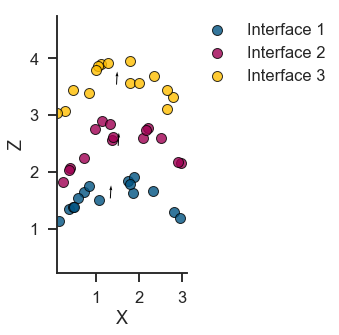

In [9]:
gp.plot.plot_data(geo_model)

In [10]:
gp.set_interpolation_data(
    geo_model, output='geology', compile_theano=True, theano_optimizer='fast_compile'
)

Compiling theano function...
Compilation Done!


In [11]:
sol = gp.compute_model(geo_model, compute_mesh=True)

../../..\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../../..\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../../..\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


In [ ]:
gp.plot.plot_surfaces_3d_ipv(geo_model)

In [13]:
from stochasticsurf import StochasticSurfaceScipy

In [14]:
surfaces = ["Interface {}".format(n + 1) for n in range(3)]
surfaces

['Interface 1', 'Interface 2', 'Interface 3']

In [15]:
stochastic_surfaces = []
for surface in surfaces:
    stochsurf = StochasticSurfaceScipy(geo_model, surface)  # create stochastic surf obj
    stochastic_surfaces.append(stochsurf)  

In [16]:
for stochsurf in stochastic_surfaces:
    stochsurf.parametrize_surfpts_naive(factor=0.01, direction="Z")

In [17]:
StochasticSurfaceScipy.modify_surface_points_all()

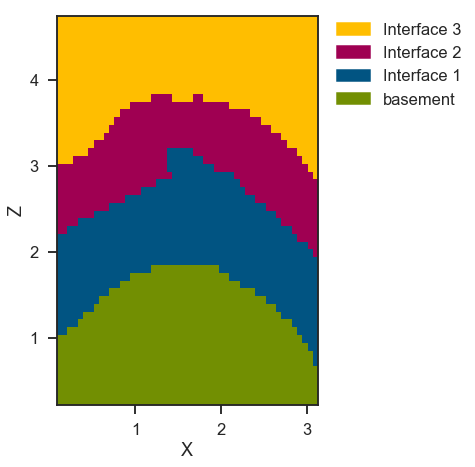

In [24]:
gp.plot.plot_section(geo_model, 24)

In [27]:
sol = gp.compute_model(geo_model, compute_mesh=True)
gp.plot.plot_surfaces_3d_ipv(geo_model)

../../..\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../../..\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../../..\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


TypeError: 'float' object is not subscriptable

In [28]:
debug

> c:\users\r02as18\miniconda3\envs\gempy\lib\site-packages\ipywidgets\widgets\widget.py(662)_handle_msg()
    660         """Called when a msg is received from the front-end"""
    661         data = msg['content']['data']
--> 662         method = data['method']
    663 
    664         if method == 'update':



ipdb>  up


*** Oldest frame


ipdb>  exit
